# Generate multiple data sets to vary criteria values

Afin de générer plusieurs jeux de données test qui vont influés sur les valeurs des critères, il faut d'abord identifier ce que les scores des facteurs relatent réellement sur notre base de données et ainsi, identifier ce qui peut déteriorer la valeur de chaque critère : 
- MixedColumnScore : valeurs aberrantes
- ColumnsScore : teste si il y a une majorité (string ou int) dans ma colonne (10% -> 0 ou 1)
- diversityScore : insérer du bruit dans nos données pour qu'elles soient moins stables (+ limiter la corrélation avec la valeur target finale)
- cellsCompletnessScore : insérer des valeurs nulles dans mon dataset => Correspond à la proportion de NULL, il suffit donc d'en injecter
- consistentRepresentationScore : détecte l'utilisation de synonymes pour décrire une seule et même chose (purement textuel)

In [26]:
import pandas as pd
import numpy as np
import os
import random

In [27]:
from MixedColumnDetector import res
from Z_Score import printresult
from CompletnessPart1 import completeness_score
from DIversificationScore import global_dataset_score

In [28]:
outliersZcoreScore = printresult('outliers_heart.csv') 
outliersColumnsScore = res('outliers_heart.csv') 
diversityScore = global_dataset_score('outliers_heart.csv')
cellsCompletnessScore = completeness_score('outliers_heart.csv')

('Age', 833, 85)
('Sex', 286, 632)
('ChestPainType', 0, 918)
('RestingBP', 918, 0)
('Cholesterol', 918, 0)
('FastingBS', 918, 0)
('RestingECG', 0, 918)
('MaxHR', 918, 0)
('ExerciseAngina', 0, 918)
('Oldpeak', 918, 0)
('ST_Slope', 0, 918)
('HeartDisease', 918, 0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f

In [5]:
print(outliersZcoreScore)
print(outliersColumnsScore)
print(diversityScore)
print(cellsCompletnessScore)

0.6263616557734204
1
0.61715519569048
1.0


## Impact BD sur les critères

### Setup à exécuter avant de passer aux tests sur les critères

In [29]:
# Charger le dataset d'origine
df = pd.read_csv("heart.csv")

# Créer un dossier de sortie
output_dir = "output_corrupt_data"
os.makedirs(output_dir, exist_ok=True)

In [30]:
#print stat nouvelles BD 
def print_stat(file_name="heart"): 
    print("-- 1 -- MixedColumnScore : valeurs aberrantes")
    value = printresult(f"{output_dir}/{file_name}.csv")
    print("ancienne valeur : ", outliersZcoreScore)
    print("nouvelle valeur :",value)
    print()
    print("-- 2 -- ColumnsScore : proportion de string")
    value = res(f"{output_dir}/{file_name}.csv")
    print("ancienne valeur : ", outliersColumnsScore)
    print("nouvelle valeur :", value)
    print()
    print("-- 3 -- diversityScore : stabilité des données")
    value = global_dataset_score(f"{output_dir}/{file_name}.csv")
    print("ancienne valeur : ", diversityScore)
    print("nouvelle valeur :",value)
    print()
    print("-- 4 -- cellsCompletnessScore : valeurs nulles")
    value = completeness_score(f"{output_dir}/{file_name}.csv")
    print("ancienne valeur : ", cellsCompletnessScore)
    print("nouvelle valeur :", value)

### Valeurs aberrantes

In [ ]:
# 1. Dégradation pour MixedColumnScore (valeurs aberrantes) => UNIQUEMENT DANS LES VALEURS NUMERIQUES
#test avec une seule itération, on a mis 10% de valeurs aberrantes
df_mixed = df.copy()
prop = 0.10
for col in df_mixed.select_dtypes(include=[np.number]).columns:
    # Injecter des valeurs aberrantes dans 10% des lignes
    indices = df_mixed.sample(frac=prop).index
    df_mixed.loc[indices, col] *= np.random.randint(100, 1000)
df_mixed.to_csv(f"{output_dir}/heart_mixed_column_score.csv", index=False)

print_stat("heart_mixed_column_score")

-- 1 -- MixedColumnScore : valeurs aberrantes
ancienne valeur :  0.6263616557734204
nouvelle valeur : 0.8997821350762527

-- 2 -- ColumnsScore : proportion de string
MAJ
('Age', 918, 0)
('Sex', 0, 918)
('ChestPainType', 0, 918)
('RestingBP', 918, 0)
('Cholesterol', 918, 0)
('FastingBS', 918, 0)
('RestingECG', 0, 918)
('MaxHR', 918, 0)
('ExerciseAngina', 0, 918)
('Oldpeak', 918, 0)
('ST_Slope', 0, 918)
('HeartDisease', 918, 0)
ancienne valeur :  1
nouvelle valeur : 1

-- 3 -- diversityScore : stabilité des données
ancienne valeur :  0.61715519569048
nouvelle valeur : 0.4999075415048113

-- 4 -- cellsCompletnessScore : valeurs nulles
ancienne valeur :  1.0
nouvelle valeur : 1.0


In [9]:
per=0.51
while per<0.6 : 
    df_mixed = df.copy()
    for col in df_mixed.select_dtypes(include=[np.number]).columns:
        # Injecter des valeurs aberrantes dans per% des lignes
        indices = df_mixed.sample(frac=per).index
        df_mixed.loc[indices, col] *= np.random.randint(1000, 1000000)
    df_mixed.to_csv(f"{output_dir}/heart_mixed_column_score.csv", index=False)
    new_value = printresult(f"{output_dir}/heart_mixed_column_score.csv")
    print(f'pour : {per*100:.1f}% des données, nouvelle valeur : {new_value:.2f}')
    if new_value<0.4 : 
        print(f'OOUUIIII : pour : {per*100:.2f}%, nouvelle valeur : {new_value:.2f}')
    per+=0.001
print ("Exécution terminée")

pour : 51.0% des données, nouvelle valeur : 0.77
pour : 51.1% des données, nouvelle valeur : 0.77
pour : 51.2% des données, nouvelle valeur : 0.77
pour : 51.3% des données, nouvelle valeur : 0.77
pour : 51.4% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 51.40%, nouvelle valeur : 0.29
pour : 51.5% des données, nouvelle valeur : 0.77
pour : 51.6% des données, nouvelle valeur : 0.28
OOUUIIII : pour : 51.60%, nouvelle valeur : 0.28
pour : 51.7% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 51.70%, nouvelle valeur : 0.29
pour : 51.8% des données, nouvelle valeur : 0.30
OOUUIIII : pour : 51.80%, nouvelle valeur : 0.30
pour : 51.9% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 51.90%, nouvelle valeur : 0.29
pour : 52.0% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 52.00%, nouvelle valeur : 0.29
pour : 52.1% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 52.10%, nouvelle valeur : 0.29
pour : 52.2% des données, nouvelle valeur : 0.29
OOUUIIII : pour : 52

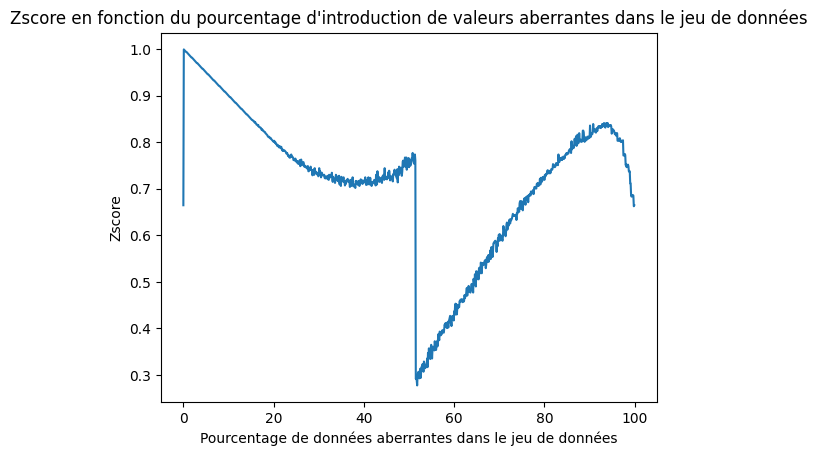

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[]
y=[]

per=0.0
while per<1 : 
    df_mixed = df.copy()
    for col in df_mixed.select_dtypes(include=[np.number]).columns:
        # Injecter des valeurs aberrantes dans per% des lignes
        indices = df_mixed.sample(frac=per).index
        df_mixed.loc[indices, col] *= np.random.randint(1000, 1000000)
    df_mixed.to_csv(f"{output_dir}/heart_mixed_column_score.csv", index=False)
    x.append(per*100)
    y.append(printresult(f"{output_dir}/heart_mixed_column_score.csv"))
    per+=0.001

#représentation graphique
plt.plot(x,y)
plt.title('Zscore en fonction du pourcentage d\'introduction de valeurs aberrantes dans le jeu de données')
plt.xlabel('Pourcentage de données aberrantes dans le jeu de données')
plt.ylabel('Zscore')
plt.show()

Ici on force des valeurs aberrantes, je pense que c'est pour ca qu'on a 0,66 à 0% de mauvaises valeurs au début : correspond à la valeur sur notre BD 
Ensuite, on voit que c'est juste la proportion que je force qui donne notre score. 

C'est normal que ce soit symétrique à partir des 50% car même si les infos ne sont pas cohérentes par rapport à notre critère, elles sont cohérentes entre elles

### Proportion int/str

In [20]:
# 2. Dégradation pour ColumnsScore (proportion de int/str)
df_mixted_column = df.copy()
nb_columns=3
proportion_string=0.5

numeric_cols = df_mixted_column.select_dtypes(include=[np.number]).columns.tolist()

# Sélection aléatoire des colonnes
selected_cols = random.sample(numeric_cols, min(nb_columns, len(numeric_cols)))

for col in selected_cols:
    indices_to_modify = df_mixted_column.sample(frac=proportion_string).index
    df_mixted_column.loc[indices_to_modify, col] = df_mixted_column.loc[indices_to_modify, col].astype(str) + "_str"

df_mixted_column.to_csv(f"{output_dir}/mixed_columns_dataset.csv", index=False)

print_stat("mixed_columns_dataset")

/var/folders/w0/8c1n56050zj35dsmfbf6htkr0000gn/T/ipykernel_3542/2291109533.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['48_str' '59_str' '55_str' '57_str' '55_str' '54_str' '52_str' '51_str'
 '67_str' '56_str' '60_str' '55_str' '57_str' '55_str' '44_str' '57_str'
 '51_str' '64_str' '67_str' '58_str' '38_str' '67_str' '63_str' '68_str'
 '35_str' '55_str' '49_str' '57_str' '55_str' '58_str' '61_str' '50_str'
 '57_str' '63_str' '43_str' '38_str' '63_str' '61_str' '46_str' '54_str'
 '58_str' '55_str' '42_str' '37_str' '45_str' '68_str' '63_str' '38_str'
 '41_str' '54_str' '57_str' '70_str' '34_str' '45_str' '56_str' '39_str'
 '57_str' '65_str' '44_str' '67_str' '43_str' '52_str' '57_str' '41_str'
 '54_str' '47_str' '55_str' '66_str' '46_str' '30_str' '61_str' '55_str'
 '60_str' '54_str' '54_str' '38_str' '54_str' '47_str' '58_str' '52_str'
 '40_str' '57_str' '48_str' '43_str' '59_str' '48_str' '41_

-- 1 -- MixedColumnScore : valeurs aberrantes
ancienne valeur :  0.6263616557734204
nouvelle valeur : 0.7461873638344226

-- 2 -- ColumnsScore : proportion de string
MAJ
('Age', 459, 459)
('Sex', 0, 918)
('ChestPainType', 0, 918)
('RestingBP', 918, 0)
('Cholesterol', 918, 0)
('FastingBS', 459, 459)
('RestingECG', 0, 918)
('MaxHR', 918, 0)
('ExerciseAngina', 0, 918)
('Oldpeak', 459, 459)
('ST_Slope', 0, 918)
('HeartDisease', 918, 0)
ancienne valeur :  1
nouvelle valeur : 0

-- 3 -- diversityScore : stabilité des données


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f

ancienne valeur :  0.61715519569048
nouvelle valeur : 0.517688322725258

-- 4 -- cellsCompletnessScore : valeurs nulles
ancienne valeur :  1.0
nouvelle valeur : 1.0


La proportion fait changer le critère que si je le mets à 3 colonnes

/var/folders/w0/8c1n56050zj35dsmfbf6htkr0000gn/T/ipykernel_3542/977639230.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['128_str' '160_str' '124_str' '131_str' '140_str' '106_str' '174_str'
 '144_str' '134_str']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mixted_column.loc[indices_to_modify, col] = df_mixted_column.loc[indices_to_modify, col].astype(str) + "_str"
/var/folders/w0/8c1n56050zj35dsmfbf6htkr0000gn/T/ipykernel_3542/977639230.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['67_str' '44_str' '62_str' '47_str' '62_str' '70_str' '67_str' '66_str'
 '65_str']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mixted_column.loc[indices_to_modify, col] = df_mixted_column.loc[indices_to_modify, col].astype(str) + "_st

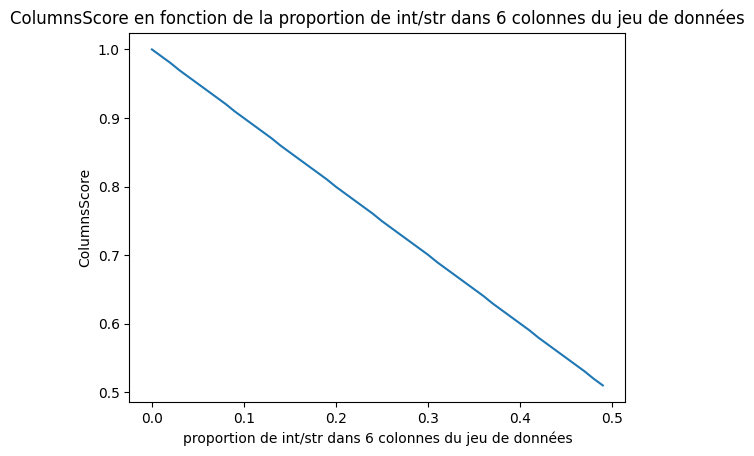

In [ ]:
#test des effets des paramètres: 
import re
import pandas as pd

def res2(path):
    # Load the CSV data into a DataFrame
    data = pd.read_csv(path)

    # Regular expression to match numeric values (integers and decimals)
    numeric_pattern = re.compile(r'^[+-]?\d+(?:\.\d+)?$')

    mixed_columns = []

    # Analyze each column
    for col in data.columns:
        col_data = data[col].astype(str)  # Convert all values to strings for regex matching

        num_count = 0
        str_count = 0
        has_number = False
        has_string = False

        for val in col_data:
            if numeric_pattern.match(val):
                num_count += 1
                has_number = True
            else:
                str_count += 1
                has_string = True

        if has_number or has_string:
            mixed_columns.append((col, num_count, str_count))
            #print(mixed_columns[-1], data[col].dtype)
    #print(len(mixed_columns))
    wrongly_attributed_percentage = 0
    for col_name, num, strs in mixed_columns:
        wrongly_attributed_percentage += (max(strs, num) / (strs + num) - 0.5)/0.5
    return wrongly_attributed_percentage / len(mixed_columns)


df_mixted_column = df.copy()
nb_columns=12
proportion=0.5

def gen_mixed_columns (nb_columns=12, proportion=0.5, data_base=df): 
    df_mixted_column = data_base.copy()

    # Sélection aléatoire des colonnes
    cols = df_mixted_column.select_dtypes(include=[np.number,"object"]).columns.tolist() #je veux toutes les colonnes string ou int

    # Sélection aléatoire des colonnes
    selected_cols = random.sample(cols, min(nb_columns, len(cols)))

    for col in selected_cols:
        indices_to_modify = df_mixted_column.sample(frac=proportion).index
        if pd.api.types.is_numeric_dtype(df_mixted_column[col]) :
            df_mixted_column.loc[indices_to_modify, col] = df_mixted_column.loc[indices_to_modify, col].astype(str) + "_str"
        else : 
            df_mixted_column.loc[indices_to_modify, col] = 0


    df_mixted_column.to_csv(f"{output_dir}/mixed_columns_dataset.csv", index=False)
    return res2(f"{output_dir}/mixed_columns_dataset.csv")


prop=0
props=[]
values=[]
colonne = 12
while prop<=0.5 : 
    props.append(prop)
    values.append(gen_mixed_columns(colonne,prop,df))
    prop+=0.01

plt.plot(props,values)
plt.title(f'ColumnsScore en fonction de la proportion de int/str dans {colonne} colonnes du jeu de données')
plt.xlabel(f'proportion de int/str dans {colonne} colonnes du jeu de données')
plt.ylabel('ColumnsScore')
plt.show()

### Diversité des données

In [40]:
# 3. Dégradation pour diversityScore (diversité, assez de représentation sur les critères)
df_diverse = df.copy()

# Injecter du bruit aléatoire dans des colonnes catégorielles et numériques
for col in df_diverse.columns:
    if df_diverse[col].dtype == "object":
        df_diverse.loc[df_diverse.sample(frac=0.1).index, col] = "??"
    elif df_diverse[col].dtype in [np.int64, np.float64]:
        # Ajouter un bruit aléatoire sur 10% des lignes
        indices = df_diverse.sample(frac=0.1).index
        df_diverse.loc[indices, col] += np.random.normal(0, 10, size=len(indices))
df_diverse.to_csv(f"{output_dir}/heart_diversity_score.csv", index=False)

print_stat("heart_diversity_score")

/var/folders/w0/8c1n56050zj35dsmfbf6htkr0000gn/T/ipykernel_3542/828404376.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[89.9429687  58.18990817 70.910786   36.30701303 23.07827945 57.28085688
 56.35970191 48.94899313 53.42399139 62.39103686 44.90767624 52.21837622
 68.61027109 71.86105473 72.01976966 72.72073392 47.03890323 70.13608319
 23.91515536 47.71039236 29.6155607  55.6229849  60.17839831 38.74217567
 54.14332855 53.39505797 71.30421927 61.63084622 22.56766041 61.87418593
 67.85925461 47.64350111 44.67282307 54.43497165 49.87314213 62.7239589
 40.27356856 51.34564565 46.78406666 52.00277568 67.3800118  30.48384048
 60.20385561 39.01618458 81.51447737 53.31269247 61.63123987 68.56423772
 18.36237854 69.60256848 64.7760366  44.07619307 66.03653638 51.40850087
 48.02458692 29.41257903 52.26106179 59.18001915 66.30066404 70.264416
 41.93228007 43.23100833 42.76229976 52.11957968 32.47475936 85

-- 1 -- MixedColumnScore : valeurs aberrantes
ancienne valeur :  0.6263616557734204
nouvelle valeur : 0.6535947712418301

-- 2 -- ColumnsScore : proportion de string
MAJ
('Age', 918, 0)
('Sex', 0, 918)
('ChestPainType', 0, 918)
('RestingBP', 918, 0)
('Cholesterol', 918, 0)
('FastingBS', 918, 0)
('RestingECG', 0, 918)
('MaxHR', 918, 0)
('ExerciseAngina', 0, 918)
('Oldpeak', 918, 0)
('ST_Slope', 0, 918)
('HeartDisease', 918, 0)
ancienne valeur :  1
nouvelle valeur : 1

-- 3 -- diversityScore : stabilité des données
ancienne valeur :  0.61715519569048
nouvelle valeur : 0.4007903712391533

-- 4 -- cellsCompletnessScore : valeurs nulles
ancienne valeur :  1.0
nouvelle valeur : 1.0


In [ ]:
# 3. Dégradation pour diversityScore (diversité, assez de représentation sur les critères)
df_diverse = df.copy()


# Injecter du bruit aléatoire dans des colonnes catégorielles et numériques
size = len(df_diverse)

# Sex : Créer un vecteur avec pop % 'M' et 1-pop % 'F', puis le mélanger à la BD
prop=1
new_sex = ['M'] * int(prop * size) + ['F'] * (size - int(prop * size))
random.shuffle(new_sex)
df_diverse["Sex"] = new_sex

#ST_Slope : erreurs produites
prop_up = 0.8
prop_flat = 0.1
new_st_slope = ['Up'] * int(prop_up * size) + ['Flat'] * (int(prop_flat * size)) + ['Down'] * (size - int((prop_up+prop_flat) * size))
random.shuffle(new_st_slope)
df_diverse["ST_Slope"] = new_st_slope


df_diverse.to_csv(f"{output_dir}/heart_diversity_score.csv", index=False)
print_stat("heart_diversity_score")

-- 1 -- MixedColumnScore : valeurs aberrantes
ancienne valeur :  0.6263616557734204
nouvelle valeur : 0.6644880174291938

-- 2 -- ColumnsScore : proportion de string
ancienne valeur :  1
nouvelle valeur : 1

-- 3 -- diversityScore : stabilité des données


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = 

KeyboardInterrupt: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = 

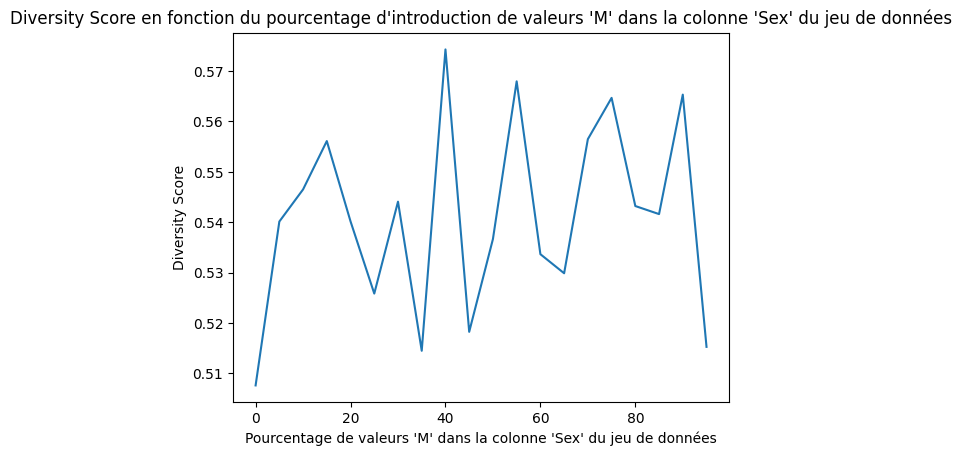

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[]
y=[]

per=0.0
while per<1 : 
    df_diverse = df.copy()
    size = len(df_diverse)
    # Pour chaque colonne, rendre 50% des cellules nulles aléatoirement
    new_sex = ['M'] * int(per * size) + ['F'] * (size - int(per * size))
    random.shuffle(new_sex)
    df_diverse["Sex"] = new_sex
    df_diverse.to_csv(f"{output_dir}/heart_diversity_score.csv", index=False)
    x.append(per*100)
    y.append(global_dataset_score(f"{output_dir}/heart_diversity_score.csv"))
    per+=0.05

#représentation graphique
plt.plot(x,y)
plt.title('Diversity Score en fonction du pourcentage d\'introduction de valeurs \'M\' dans la colonne \'Sex\' du jeu de données')
plt.xlabel('Pourcentage de valeurs \'M\' dans la colonne \'Sex\' du jeu de données')
plt.ylabel('Diversity Score')
plt.show()

### Completness

In [28]:
# 4. Dégradation pour cellsCompletnessScore (valeurs nulles)
df_nulls = df.copy()
# Pour chaque colonne, rendre 50% des cellules nulles aléatoirement
for col in df_nulls.columns:
    null_indices = df_nulls.sample(frac=0.5).index
    df_nulls.loc[null_indices, col] = np.nan

df_nulls.to_csv(f"{output_dir}/heart_cells_completeness_score.csv", index=False)

file_name = "heart_cells_completeness_score"
print_stat("heart_cells_completeness_score")


-- 1 -- MixedColumnScore : valeurs aberrantes
ancienne valeur :  0.6263616557734204
nouvelle valeur : 0.6492374727668846

-- 2 -- ColumnsScore : proportion de string
ancienne valeur :  1
nouvelle valeur : 0

-- 3 -- diversityScore : stabilité des données


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:59: RuntimeWarning: invalid value encountered in sqrt
  tval = r * np.sqrt(dof / (1 - r**2))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/effsize.py:153: RuntimeWarning: invalid value encountered in sqrt
  se = 1 / np.sqrt(nx - 3)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:59: RuntimeWarning: invalid value encountered in sqrt
  tval = r * np.sqrt(dof / (1 - r**2))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/effsize.py:153: RuntimeWarning: invalid value encountered in sqrt
  se = 1 / np.sqrt(nx - 3)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:59: RuntimeWarning: invalid value encountered in sqrt
  tval = r * np.sqrt(dof / (1 - r**2))
/Library/Frameworks/Python.framework/Versions

ancienne valeur :  0.6124312761099725
nouvelle valeur : 0.3552958873262253

-- 4 -- cellsCompletnessScore : valeurs nulles
ancienne valeur :  1.0
nouvelle valeur : 0.5


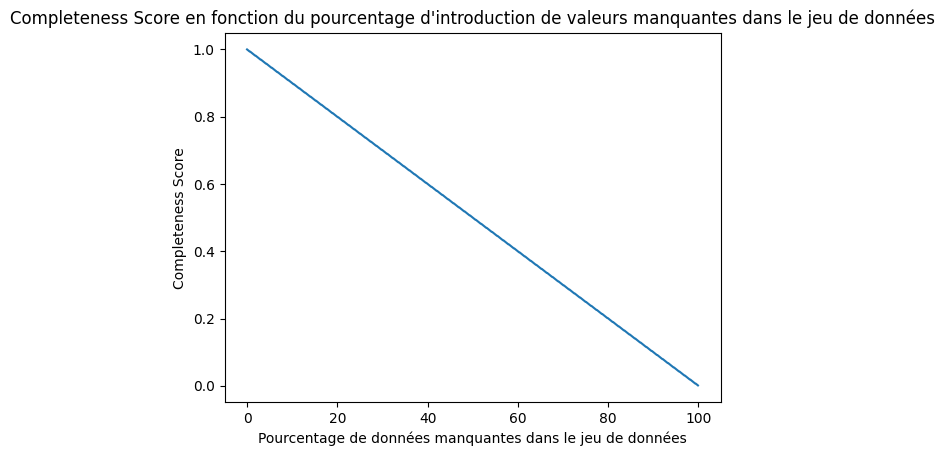

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[]
y=[]

per=0.0
while per<1 : 
    df_nulls = df.copy()
    # Pour chaque colonne, rendre 50% des cellules nulles aléatoirement
    for col in df_nulls.columns:
        null_indices = df_nulls.sample(frac=per).index
        df_nulls.loc[null_indices, col] = np.nan
    df_nulls.to_csv(f"{output_dir}/heart_cells_completeness_score.csv", index=False)
    x.append(per*100)
    y.append(completeness_score(f"{output_dir}/heart_cells_completeness_score.csv"))
    per+=0.001

#représentation graphique
plt.plot(x,y)
plt.title('Completeness Score en fonction du pourcentage d\'introduction de valeurs manquantes dans le jeu de données')
plt.xlabel('Pourcentage de données manquantes dans le jeu de données')
plt.ylabel('Completeness Score')
plt.show()

## Création des BD

In [18]:
import pandas as pd
import numpy as np
import os
import random

In [19]:
#import des fonctions pour calculer les critères 
#from MixedColumnDetector import res
import re
def res2(path):
    # Load the CSV data into a DataFrame
    data = pd.read_csv(path)

    # Regular expression to match numeric values (integers and decimals)
    numeric_pattern = re.compile(r'^[+-]?\d+(?:\.\d+)?$')

    mixed_columns = []

    # Analyze each column
    for col in data.columns:
        col_data = data[col].astype(str)  # Convert all values to strings for regex matching

        num_count = 0
        str_count = 0
        has_number = False
        has_string = False

        for val in col_data:
            if numeric_pattern.match(val):
                num_count += 1
                has_number = True
            else:
                str_count += 1
                has_string = True

        if has_number or has_string:
            mixed_columns.append((col, num_count, str_count))
    wrongly_attributed_percentage = 0
    for col_name, num, strs in mixed_columns:
        wrongly_attributed_percentage += (max(strs, num) / (strs + num) - 0.5)/0.5
    return wrongly_attributed_percentage / len(mixed_columns)


from Z_Score import printresult
from CompletnessPart1 import completeness_score
from DIversificationScore import global_dataset_score

In [20]:
# Charger le dataset d'origine
df = pd.read_csv("heart.csv")


# Créer les dossiers de sortie
output_dir = "output_corrupt_data"
os.makedirs(output_dir, exist_ok=True)

columns_names = ["val_aber", "prop_int_str", "diversite", "completness"]
for dir in columns_names : 
    os.makedirs(f"{output_dir}/{dir}", exist_ok=True)

#créer le df pour le csv de sortie récapitulatif
columns_names.insert(0, 'file_name')
df_recap_test = pd.DataFrame(columns=columns_names)

In [21]:
crit_name = "val_aber"
# 1. Dégradation pour MixedColumnScore (valeurs aberrantes) => UNIQUEMENT DANS LES VALEURS NUMERIQUES
#entrée utilisateur 
prop_min = 0.1
prop_max = 0.60
pas = 0.01


#programme automatique
prop=prop_min
while prop<=prop_max :
    df_mixed = df.copy()
    for col in df_mixed.select_dtypes(include=[np.number]).columns:
        # Injecter des valeurs aberrantes dans prop% des lignes
        indices = df_mixed.sample(frac=prop).index
        df_mixed.loc[indices, col] *= np.random.randint(100, 1000)
    file_name=f"{output_dir}/{crit_name}/{crit_name}_{prop:.2f}.csv"
    df_mixed.to_csv(file_name, index=False)
    #ajout de chaque fichier créer à notre df_recap_test
    df_recap_test.loc[len(df_recap_test)] = [
        file_name, 
        printresult(file_name),                                  
        res2(file_name),                                   
        global_dataset_score(file_name),                                   
        completeness_score(file_name)                                
    ]
    prop+=pas

In [22]:
crit_name="prop_int_str"
# 2. Dégradation pour ColumnsScore (proportion de int/str)
#entrée utilisateur 
nb_columns=7
prop_min = 0.1
prop_max = 0.80
pas = 0.05


#programme automatique
prop=prop_min
df_mixted_column = df.copy()
cols = df.select_dtypes(include=[np.number,"object"]).columns.tolist() #je veux toutes les colonnes string ou int
for i in range (nb_columns+1) :
    while prop<=prop_max :
        df_mixted_column = df.copy()
        # Sélection aléatoire des colonnes
        selected_cols = random.sample(cols, min(nb_columns, len(cols)))

        for col in selected_cols:
            indices_to_modify = df_mixted_column.sample(frac=prop).index
            if pd.api.types.is_numeric_dtype(df_mixted_column[col]) :
                df_mixted_column.loc[indices_to_modify, col] = df_mixted_column.loc[indices_to_modify, col].astype(str) + "_str"
            else : 
                df_mixted_column.loc[indices_to_modify, col] = 0
        
        file_name=f"{output_dir}/{crit_name}/{crit_name}_{nb_columns:0f}_{prop:.2f}.csv"
        df_mixted_column.to_csv(file_name, index=False)
        #ajout de chaque fichier créer à notre df_recap_test
        df_recap_test.loc[len(df_recap_test)] = [
            file_name, 
            printresult(file_name),                                  
            res2(file_name),                                   
            np.nan,                                   
            completeness_score(file_name)                                
        ]
        prop+=pas

/var/folders/w0/8c1n56050zj35dsmfbf6htkr0000gn/T/ipykernel_1362/693353096.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['52_str' '56_str' '65_str' '54_str' '41_str' '57_str' '58_str' '47_str'
 '41_str' '48_str' '71_str' '58_str' '53_str' '63_str' '76_str' '65_str'
 '57_str' '39_str' '54_str' '49_str' '65_str' '56_str' '45_str' '48_str'
 '56_str' '41_str' '61_str' '38_str' '43_str' '53_str' '57_str' '68_str'
 '54_str' '55_str' '41_str' '55_str' '38_str' '41_str' '51_str' '63_str'
 '54_str' '67_str' '55_str' '42_str' '43_str' '70_str' '49_str' '52_str'
 '67_str' '54_str' '40_str' '35_str' '48_str' '47_str' '55_str' '50_str'
 '71_str' '59_str' '53_str' '59_str' '55_str' '52_str' '49_str' '44_str'
 '49_str' '38_str' '65_str' '58_str' '57_str' '67_str' '64_str' '61_str'
 '57_str' '57_str' '51_str' '41_str' '68_str' '59_str' '52_str' '63_str'
 '42_str' '34_str' '51_str' '65_str' '57_str' '51_str' '35_s

In [23]:
crit_name="diversite"
# 3. Dégradation pour diversityScore (diversité, assez de représentation sur les critères)
prop_sex_min = 0
prop_sex_max= 0.5
#prop_flat_min = 0
#prop_flat_max = 0
#prop_up_min = 0
#prop_up_max = 0
pas = 0.05


#programme automatique
prop_sex=prop_sex_min
#prop_flat=prop_flat_min
#prop_up=prop_up_min

size = len(df)
df_diverse = df.copy()

# Injecter du bruit aléatoire dans des colonnes Sex
while prop_sex<=prop_sex_max : 
    df_diverse = df.copy()
    # Sex : Créer un vecteur avec pop_sex % 'M' et 1-pop_sex % 'F', puis le mélanger à la BD
    new_sex = ['M'] * int(prop_sex * size) + ['F'] * (size - int(prop_sex * size))
    random.shuffle(new_sex)
    df_diverse["Sex"] = new_sex
    file_name=f"{output_dir}/{crit_name}/{crit_name}_Sex_{prop_sex:.2f}.csv"
    df_diverse.to_csv(file_name, index=False)
    #ajout de chaque fichier créer à notre df_recap_test
    df_recap_test.loc[len(df_recap_test)] = [
        file_name, 
        printresult(file_name),                                  
        res2(file_name),                                   
        global_dataset_score(file_name),                                   
        completeness_score(file_name)                                
    ]
    prop_sex+=pas


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = 

seulement le sexe pour la diversité pour l'instant

In [24]:
crit_name="completness"
# 4. Dégradation pour cellsCompletnessScore (valeurs nulles)
#entrée utilisateur 
prop_min = 0.1
prop_max = 0.8
pas = 0.05

#programme automatique
prop=prop_min
while prop<=prop_max :
    df_nulls = df.copy()
    # Pour chaque colonne, rendre 50% des cellules nulles aléatoirement
    for col in df_nulls.columns:
        null_indices = df_nulls.sample(frac=prop).index
        df_nulls.loc[null_indices, col] = np.nan
    file_name=f"{output_dir}/{crit_name}/{crit_name}_{prop:.2f}.csv"
    df_nulls.to_csv(file_name, index=False)
    #ajout de chaque fichier créer à notre df_recap_test
    df_recap_test.loc[len(df_recap_test)] = [
        file_name, 
        printresult(file_name),                                  
        res2(file_name),                                   
        np.nan,                                   
        completeness_score(file_name)                                
    ]
    prop+=pas

limite de cette méthode = 
- le null sont mis n'importe comment et il va se pv que des fois il se mettent sur des colonnes plus importantes que d'autes 

In [25]:
df_recap_test.to_csv(f"{output_dir}/recap_test.csv", index=False)